In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#Questions to answer:
#Has life expectancy increased over time in the six nations?
#Has GDP increased over time in the six nations?
#Is there a correlation between GDP and life expectancy of a country?
#What is the average life expectancy in these nations?
#What is the distribution of that life expectancy?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [8]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [9]:
df = df.rename({'Life expectancy at birth (years)':'LEAB'}, axis = 'columns')
df.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [ ]:
#The plot below is showing the distribution of GDP in Trilloins of U.S. Dollars

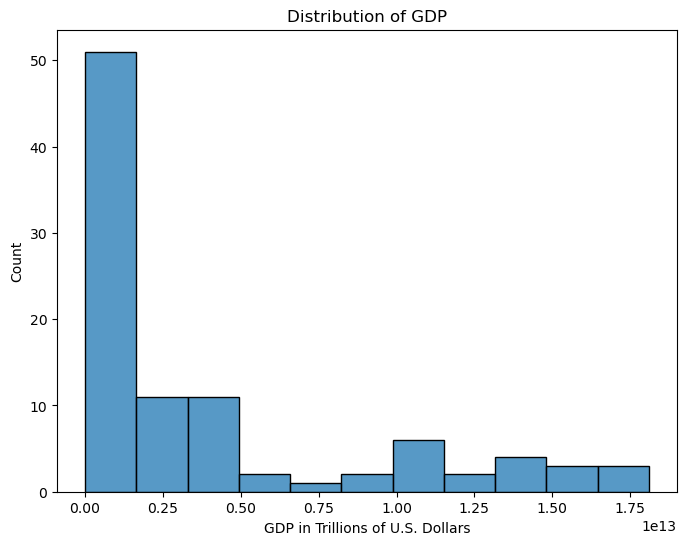

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GDP'])
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("Distribution of GDP")
plt.show()

In [ ]:
#The plot below is showing the distribution of life expectancy in years

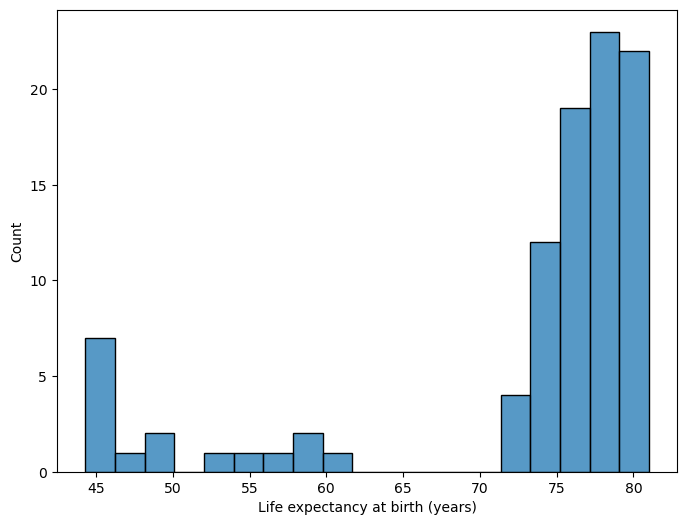

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LEAB'])
plt.xlabel('Life expectancy at birth (years)')
plt.show()

In [14]:
df_means = df.drop('Year', axis=1).groupby('Country').mean().reset_index()

In [16]:
df_means

,Country,LEAB,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


In [30]:
#Plot below display the distribution of life expectancy with data broken down by country

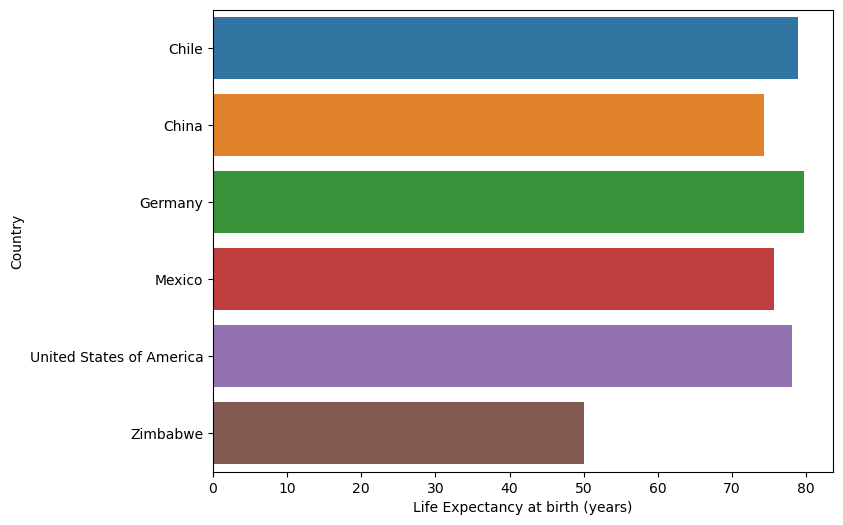

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='LEAB', y='Country', data=df_means)
plt.xlabel('Life Expectancy at birth (years)');

In [ ]:
#Plot below display the distribution of GDP with data broken down by country

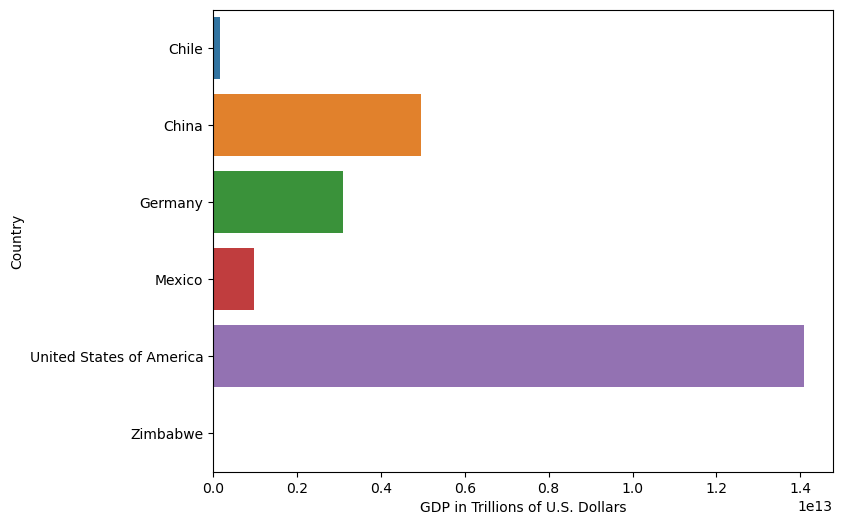

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='GDP', y='Country', data=df_means)
plt.xlabel('GDP in Trillions of U.S. Dollars');

In [ ]:
#Line chart below is showing the comparison of distribution of GDP between countries

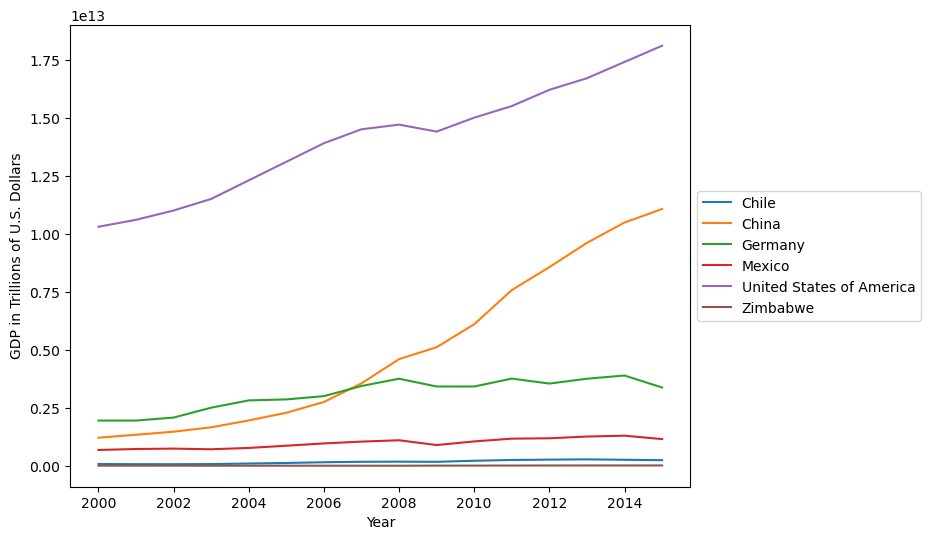

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S. Dollars');

In [ ]:
#Line charts below are showing the comparison of life expectancy between countries

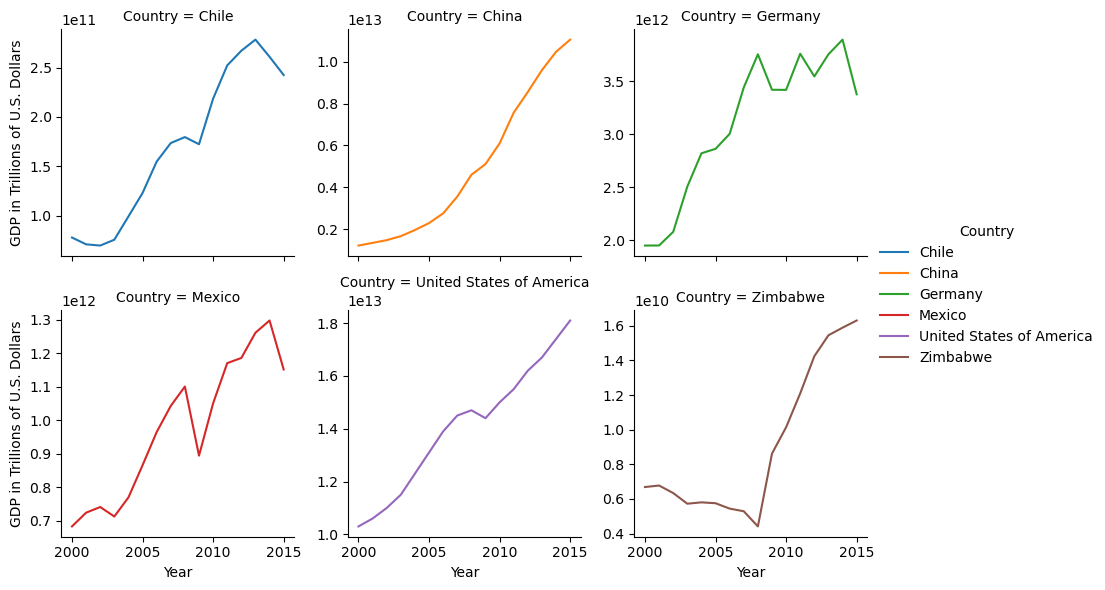

In [24]:
graphGDP = sns.FacetGrid(df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP')
           .add_legend()
           .set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars'))
graphGDP;

In [ ]:
#Line chart above is showing the difference between life expectancy in different countries and the growth of life expectancy in Zimbabwe from year 2004 till 2014

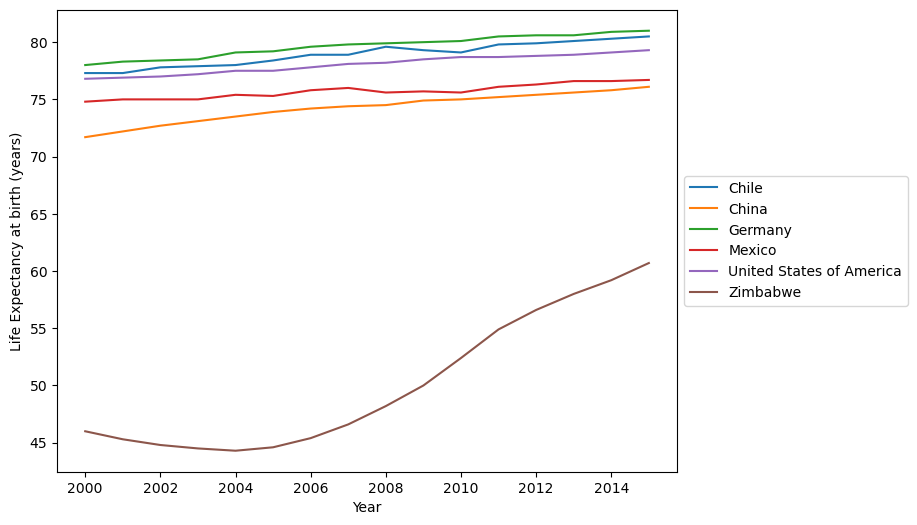

In [26]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life Expectancy at birth (years)');

In [ ]:
#The next two charts are showing the relationship between GPD and life expectancy in different countries

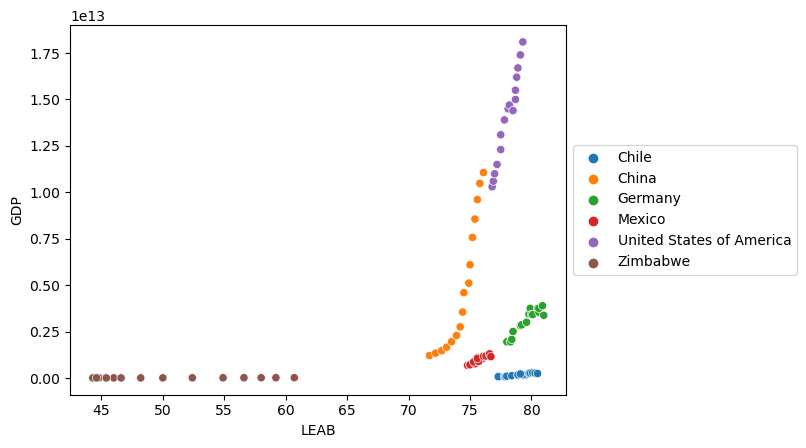

In [28]:
sns.scatterplot(x=df.LEAB, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

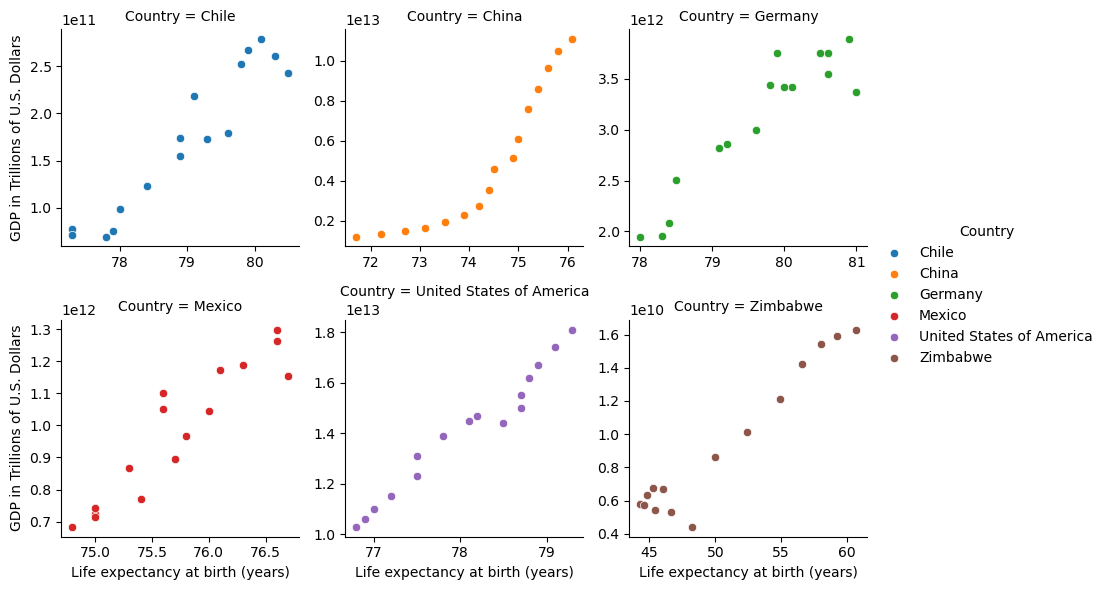

In [29]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEAB", "GDP")
         .add_legend()
         .set_axis_labels('Life expectancy at birth (years)', 'GDP in Trillions of U.S. Dollars'));